In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
train = pd.read_csv("Data/titanic/train.csv")
test = pd.read_csv("Data/titanic/test.csv")
train # train_data info 
# There are 891 data in training data. (Too less)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
test # test_data info
# There are 418 data in testing data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train.info()
'''
PassengerId ==> ID of passenger
Pclass ==> The class of passenger (1/2/3 cabin)
Name ==> Name of passenger
Sex ==> Gender of passenger
Age ==> Age of passenger
SibSp ==> siblings 
Parch ==> number of family members
Ticket ==> ticket message
Fare ==> ticket fee
Cabin ==> place where passenger live in the ship
Embarked ==> the ports that passengers are going to land 
'''
# There are 891 passengers (max) in the training data. 
# Some values are missing. Examples are in the following
# Age property has only 714 records.
# Cabin property has only 204 passenger.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'\nPassengerId ==> ID of passenger\nPclass ==> The class of passenger (1/2/3 cabin)\nName ==> Name of passenger\nSex ==> Gender of passenger\nAge ==> Age of passenger\nSibSp ==> siblings \nParch ==> number of family members\nTicket ==> ticket message\nFare ==> ticket fee\nCabin ==> place where passenger live in the ship\nEmbarked ==> the ports that passengers are going to land \n'

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# View the basic statistical details of training data
# About 0.383838 ppl are saved finally. Survived is a categorical feature with 0 or 1 values.
# The average age of passenger is 29.7.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


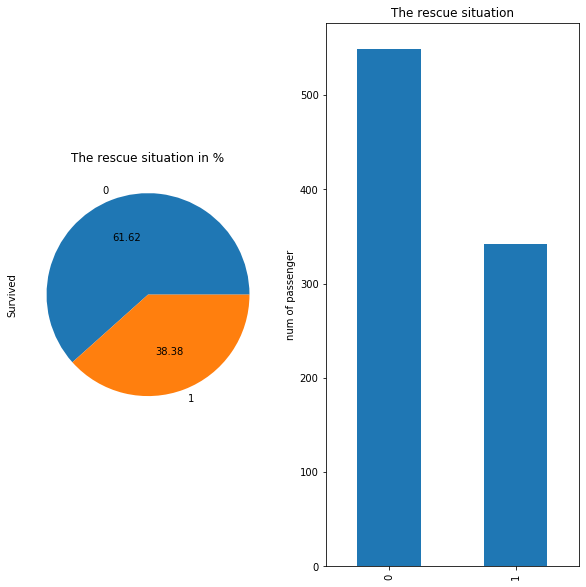

In [6]:
# Check the relationships between each properties

fig = plt.figure()
fig.set_figheight(10) # set the height of the figure
fig.set_figwidth(10)
# value_counts(): return a Series containing counts of unique values.

# 1. Count the no of ppl is saved or dead
#print(train['Survived'].value_counts()) 
# According to the data above (0.383838), we know that 342 passengers are saved.
# 0 is died , 1 is survived.

#print(train[train['Survived']==0]) # Show the data of died passenger
#print(train[train['Survived']==1]) # show the data of survived passenger

# Show the percentage in pie chart
plt.subplot2grid((1,2),(0,0))
train['Survived'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title("The rescue situation in %")

# Show the no of ppl in bar chart
plt.subplot2grid((1,2),(0,1))
train['Survived'].value_counts().plot(kind='bar')
plt.title("The rescue situation")
plt.ylabel("num of passenger")
plt.show()

<Figure size 720x720 with 0 Axes>

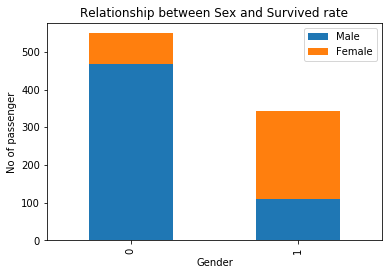

In [7]:
# 2. Check which gender has a higher opportunity to get saved (Survived)
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

survived_m = train.Survived[train.Sex=='male'].value_counts()
#print(survived_m) # 0 is died , 1 is survive. More male is died. (468 vs 109)
survived_f = train.Survived[train.Sex=='female'].value_counts()
#print(survived_f)  # More female is survived. (233 vs 81)
df = pd.DataFrame({'Male':survived_m,'Female':survived_f})
df.plot(kind='bar', stacked=True)
plt.title("Relationship between Sex and Survived rate")
plt.xlabel('Gender')
plt.ylabel('No of passenger')
plt.show()
# More female survived. (Ladies first= =)
# 0 is dead, 1 is survived.

<Figure size 720x720 with 0 Axes>

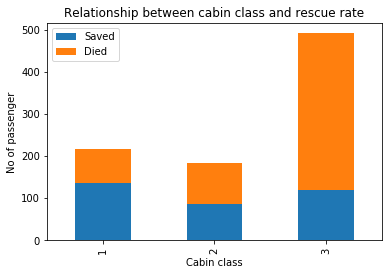

"\n#Want to show the figure in pie chart\nplt.subplot2grid((1,2),(0,1))\ndead = train.Pclass[train.Survived==0].value_counts()\nlive = train.Pclass[train.Survived==0].value_counts()\ndf = pd.DataFrame({'Saved':live, 'Died':dead})\ndf.plot(kind='pie', autopct='%.2f')\n"

In [8]:
# 3. Check relationship of cabin class and rescured rate
fig = plt.figure()
fig.set(alpha=0.2) # set up the color transparency
fig.set_figheight(10)
fig.set_figwidth(10)

#plt.subplot2grid((1,2),(0,0))
dead = train.Pclass[train.Survived==0].value_counts()
live = train.Pclass[train.Survived==1].value_counts()
df = pd.DataFrame({'Saved':live, 'Died':dead})
df.plot(kind='bar', stacked=True)
plt.title("Relationship between cabin class and rescue rate")
plt.xlabel("Cabin class")
plt.ylabel("No of passenger")
plt.show()

'''
#Want to show the figure in pie chart
plt.subplot2grid((1,2),(0,1))
dead = train.Pclass[train.Survived==0].value_counts()
live = train.Pclass[train.Survived==0].value_counts()
df = pd.DataFrame({'Saved':live, 'Died':dead})
df.plot(kind='pie', autopct='%.2f')
'''
# It seems that more ppl in cabin 3 are died.
# While ppl in cabin 1 and 2 have higher opportunity to get saved.

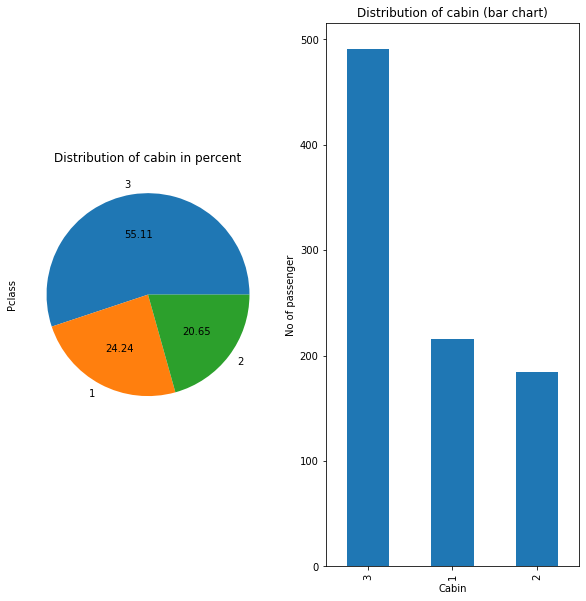

In [9]:
# 3. Check the distribution of cabin
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.subplot2grid((1,2),(0,0))
train.Pclass.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Distribution of cabin in percent')

plt.subplot2grid((1,2),(0,1))
train.Pclass.value_counts().plot(kind='bar')
plt.xlabel("Cabin")
plt.ylabel("No of passenger")
plt.title('Distribution of cabin (bar chart)')
plt.show()
# Most of the ppl are in cabin 3.

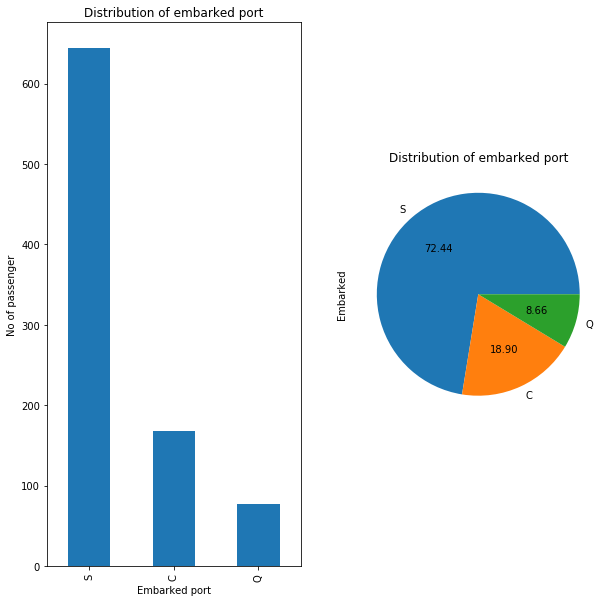

In [10]:
# 4. Check the no of passenger in each embarked port
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.subplot2grid((1,2),(0,0))
train['Embarked'].value_counts().plot(kind='bar')
plt.title('Distribution of embarked port')
plt.xlabel('Embarked port')
plt.ylabel('No of passenger')

plt.subplot2grid((1,2),(0,1))
train['Embarked'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Distribution of embarked port')
plt.show()

<Figure size 720x720 with 0 Axes>

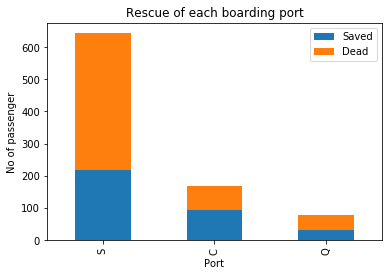

In [11]:
# 5. Rescue of each boarding port
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

dead = train.Embarked[train.Survived==0].value_counts()
save = train.Embarked[train.Survived==1].value_counts()
df = pd.DataFrame({'Saved':save, 'Dead':dead})
df.plot(kind='bar', stacked=True)
plt.title("Rescue of each boarding port")
plt.xlabel('Port')
plt.ylabel('No of passenger')

plt.show()

<Figure size 720x720 with 0 Axes>

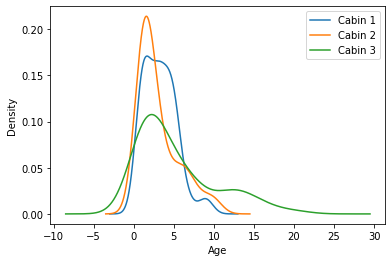

In [12]:
# 6. Age distribution in different cabin
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

cabin_1 = train.Age[train.Pclass == 1].value_counts()
cabin_2 = train.Age[train.Pclass == 2].value_counts()
cabin_3 = train.Age[train.Pclass == 3].value_counts()
df = pd.DataFrame({'Cabin 1':cabin_1,'Cabin 2':cabin_2, 'Cabin 3':cabin_3})
df.plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(loc='best')

In [13]:
# Data Preprocessing / Feature engineering
# Fill the missing data with Random Forest Classifier
def set_missing_ages(df):
    # Input the known characteristics 
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    
    # Divide the passenger into 2 parts
    # Parts that know the age, the other is do not know the age
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    # y-axis: the age 
    y = known_age[:,0]
    
    # x-axis: the value of characteristics
    x = known_age[:,1:]
    
    # Fit the data to Random Forest Regressor
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(x, y)
    
    # Use the model to do prediction of the unknown age
    predictedAges = rfr.predict(unknown_age[:,1::])
    
    # Fill the missing data
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = "Yes"
    df.loc[(df.Cabin.isnull()), 'Cabin'] = "No"
    return df

train, rfr = set_missing_ages(train)
train = set_Cabin_type(train)
train

/home/cindy/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/home/cindy/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,No,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,No,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,Yes,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,16.19395,1,2,W./C. 6607,23.4500,No,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,Yes,C


In [14]:
# Use get_dummies in pandas to do one-hot encoding and connect the data to the original training data
# Convert categorical variable into dummy / indicator variables.
# You can also create a function to do one-hot encoding
# E.g IMDb examples in deep learning with Keras

dummies_Cabin = pd.get_dummies(train['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(train['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(train['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(train['Pclass'], prefix='Pclass')

# Combine all dummies together
df = pd.concat([train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.00000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.00000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.00000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.00000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.00000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.00000,0,0,13.0000,1,0,0,0,1,0,1,0,1,0
887,888,1,19.00000,0,0,30.0000,0,1,0,0,1,1,0,1,0,0
888,889,0,16.19395,1,2,23.4500,1,0,0,0,1,1,0,0,0,1
889,890,1,26.00000,0,0,30.0000,0,1,1,0,0,0,1,1,0,0


In [15]:
# Do scaling to prevent the gradient-descent is invalid.
# Value in propertiers Age and Fare are too extreme.
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
#age_scale_param = scaler.fit(df['Age'])
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1))
#fare_scale_param = scaler.fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1))
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.00000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.00000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.00000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.00000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.00000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.00000,0,0,13.0000,1,0,0,0,1,0,1,0,1,0,-0.194333,-0.386671
887,888,1,19.00000,0,0,30.0000,0,1,0,0,1,1,0,1,0,0,-0.781608,-0.044381
888,889,0,16.19395,1,2,23.4500,1,0,0,0,1,1,0,0,0,1,-0.987599,-0.176263
889,890,1,26.00000,0,0,30.0000,0,1,1,0,0,0,1,1,0,0,-0.267742,-0.044381


In [16]:
# Build the model
# With Logistic Regression in Scikit-learn module
# model the probability of a certain class or event existing such as pass/fail, win/lose, etc.
from sklearn import linear_model
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_*|Pclass.*')
train_np = train_df.values

# y: result of Survival
y = train_np[:,0]

# x: properties of characteristics
X = train_np[:,1:]

clf = linear_model.LogisticRegression(solver='liblinear', C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

In [17]:
# Do the same data preprocessing on test_data
data_test = pd.read_csv("Data/titanic/test.csv")
data_test.loc[(data_test.Fare.isnull()), 'Fare'] = 0
tmp_df = data_test[['Age','Fare','Parch','SibSp','Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values

X = null_age[:,1:]
predicted_Age = rfr.predict(X)
data_test.loc[(data_test.Age.isnull()), 'Age'] = predicted_Age

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix='Pclass')

df_test = pd.concat([data_test,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass], axis=1)
df_test.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1))
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1))
df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740


In [18]:
test = df_test.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_*|Pclass.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("Data/titanic/logistic_regression_predictions.csv",index=False)

In [19]:
pd.read_csv("Data/titanic/logistic_regression_predictions.csv")
# Accuracy : 0.7655555

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [20]:
# check the coefficient of model and feature
pd.DataFrame({"Columns":list(train_df.columns)[1:], "Coefficent":list(clf.coef_.T)})
# Sex: Female passenger has higher opportunity to be rescued, and male reduce the opportunity.
# Pclass: The probability of first-class passengers being rescued will increase, while second and third-class passenger being rescued will decrease.
# The cabin value will greatly increase the probability of final rescue.


,Columns,Coefficent
0,SibSp,[-0.34423555117851445]
1,Parch,[-0.1049160228152343]
2,Cabin_No,[-0.2629441491066242]
3,Cabin_Yes,[0.6391621317998065]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.41726518580299765]
7,Sex_female,[2.2195168210602514]
8,Sex_male,[-0.4144745267544679]
9,Pclass_1,[0.3411590402799957]


In [21]:
# Cross validation
# divide data into 2 parts, one part is training and one part is validation
# E.G K-fold cross-validation in Deep Learning in Python
from sklearn.model_selection import cross_val_score, train_test_split
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1',tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_*|Pclass.*')
X = all_data.values[:,1:]
Y = all_data.values[:,0]
score = cross_val_score(clf,X,Y, cv=5)
mean_score = score.mean()
print(score)
print(mean_score)
# mean accuracy: 0.80245433......

[0.81564246 0.80898876 0.78651685 0.78651685 0.81460674]
0.8024543343167411


In [22]:
split_train, split_cv = train_test_split(df, test_size=0.3,random_state=42)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_*|Pclass.*')

# build the model
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0,penalty='l1',tol=1e-6)
clf.fit(train_df.values[:,1:], train_df.values[:,0])

# Do prediction with data with cross validation
cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_*|Pclass.*')
predictions = clf.predict(cv_df.values[:,1:])

original_train = pd.read_csv("Data/titanic/train.csv")
bad_cases = original_train.loc[original_train['PassengerId'].isin(split_cv[predictions!=cv_df.values[:,0]]['PassengerId'].values)]
print(bad_cases)

     PassengerId  Survived  Pclass  \
23            24         1       1   
25            26         1       3   
49            50         0       3   
55            56         1       1   
65            66         1       3   
78            79         1       2   
81            82         1       3   
118          119         0       1   
139          140         0       1   
165          166         1       3   
199          200         0       2   
204          205         1       3   
235          236         0       3   
286          287         1       3   
292          293         0       2   
298          299         1       1   
312          313         0       2   
338          339         1       3   
357          358         0       2   
362          363         0       3   
377          378         0       1   
390          391         1       1   
396          397         0       3   
404          405         0       3   
430          431         1       1   
447         

In [23]:
# Model ensemble
from sklearn.ensemble import BaggingRegressor
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_*|Pclass.*')
train_np = train_df.values
y = train_np[:,0]
x = train_np[:,1:]

# penalty only supports l2 penalty but not l1 penalty (strange = =)
clf = linear_model.LogisticRegression(C=1.0,penalty='l2',tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0,bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(x,y)

test = df_test.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_*|Pclass.*')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("Data/titanic/logistic_regression_predictions_1.csv",index=False)

In [24]:
pd.read_csv("Data/titanic/logistic_regression_predictions_1.csv").head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
